# ASHRAE - Great Energy Predictor III: How much energy will a building consume?

![](https://i.imgur.com/A4GiwwB.png)

Assessing the value of energy efficiency improvements can be challenging as there's no way to truly know how much energy a building would have used without the improvements. The best we can do is to build counterfactual models. Once a building is overhauled the new (lower) energy consumption is compared against modeled values for the original building to calculate the savings from the retrofit. More accurate models could support better market incentives and enable lower cost financing.

This Kaggle competition challenges you to build these counterfactual models across four energy types based on historic usage rates and observed weather. The dataset includes three years of hourly meter readings from over one thousand buildings at several different sites around the world.

The evaluation metric given by the competion is as follows:
![](https://i.imgur.com/bnwwZLG.png)

In this tutorial, we'll follow a step-by-step process for building the ML model:
* Download the dataset 
* Exploring the dataset
* Prepare the dataset for training
* Training a baseline model
* Train & Evaluate Different Models

This competition provides an interesting grab-bag of sub-problems to solve: 
* The data is messy and needs cleaned (site 0); 
* The data sources are inconsistent (meter timestamps vs. weather timestamps); 
* It asks you to predict several different vaguely related sets of values (meter type);
* It has hugely important categorical features (building_id); and we can find lots of external data to supplement the provided data. This makes it hard to know where to start and what areas are most important to tackle.



**Let's start with Machine leanring theory:**

In this section, I will take you through different types and techiniques of ML models to get blueprint of models we are going to use.

Machine learning is a "Field of study that gives computers the ability to learn without being explicitly programmed”.

The process starts with feeding good quality data and then training our machines(computers) by building machine learning models using the data and different algorithms. The choice of algorithms depends on what type of data do we have and what kind of task we are trying to automate.

![Machine learning approach](https://i.imgur.com/qdggTQg.png)



**Supervised vs. Unsupervised**

In supervised learning, the training set you feed to the algorithm includes the desired solutions, called labels, where as in unsupervised learning, the training data is unlabeled. 

Let us look at the supervised ML models:

**Regression vs. Classification**

Problems where a continuous numeric value must be predicted for each input are known as regression problems while problems where each input must be assigned a discrete category (also called label or class) are known as classification problems.

Again we can divide supervised models as linear and tree based models.

**Linear models**

Linear models are the ones which work on the priciples of linear relationships between the input and output variables. The Linear models can be expressed in the form of linear equations. 

*Linear regression* algorithms gives way to advanced models such as Lasso, Ridge and ElasticNet which introduces the penalty terms. The idea is that shrinking (or penalizing) the coefficients, the overall accuracy can be improved. In case of Lasso, the penalty term is absolute value of weights, Ridge takes into account the squared value of weights. ElasticNet on the other hand takes into account both absolute and squared value of regularization.

*Logistic regression* is a classifier. It is the linear algorithm of modelling the probability of descrete output given inputs. It is a statistical method for classification that is generalized to multiclass classification.

**Tree models**

Tree based models on the other hand works on the priciples of information gain/entropy. The nodes are divided into subnodes on the basis of how the gini index decreases (information gain) when we split the data at some point on the variable. 

**Tree Based algorithms:**

*Decision tree* is basic for the tree based algorithms. Unlike linear models, they capture the non-linear relations quite well. In this method the data is splitted into two or more homogeneous splits on the basis of the most significant splitters among the input variables. They can be applied for both categorical or continous variables. 

`Nodes` - the varable on which a decision is being made 

`Root node` - the first node to be split is called the root node. 

`Split` - it is a process of dividing the data into subnodes

`Decision node` - the sub node which is divided into further sub nodes

`Parent and child Node` - The upper node to split is called parent node and nodes which is has split into are called child nodes.

`Branch` - Subsection of entire tree.

`Leaf Node` - The last node on which the final decision is made.

`Pruning` - Removing subnodes from the decision nodes

**Ensembling Techniques**  

Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. Basic idea is to learn a set of classifiers (experts) and to allow them to vote.

The main causes of error in the ML models are variance and bias. Ensembling methods helps to minimize these errors.

**Bias**

The inability of a ML model to capture the true relation on the training dataset is called bias.

**Variance**

The difference in the fits in the training sets is called as variance.

There is a basic trade of between bias and variance. A model which can capture the true relation on the training dataset will have high variability in the sums of squares.

Bagging and Boosting are two types of Ensemble Learning. These two decrease the variance of a single estimate as they combine several estimates from different models. Boosting tries to reduce bias.

**Bagging:**

Bootstrap Aggregating, also known as bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It decreases the variance and helps to avoid overfitting. It is usually applied to decision tree methods. Bagging is a special case of the model averaging approach.  

Implementation steps of Bagging:

1. Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.
2. A base model is created on each of these subsets.
3. Each model is learned in parallel from each training set and independent of each other.
4. The final predictions are determined by combining the predictions from all the models.
Random Forest is one of the bagging models widely used.

**Boosting**

Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models is added.

Algorithm:

1. Initialise the dataset and assign equal weight to each of the data point.
2. Provide this as input to the model and identify the wrongly classified data points.
3. Increase the weight of the wrongly classified data points and decrease the weights of correctly classified data points. And then normalize the weights of all data points.
4. if (got required results)
  Goto step 5
   else
  Goto step 2
5. End

 

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="ashrae-energy-prediction")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

## 1. Download the Dataset

The steps need to do in this section are:

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

### Install required libraries
Install and import the libraries to download and read the dataset, visualize the data and also to train the ML models.

In [5]:
! pip install opendatasets pandas numpy matplotlib seaborn folium --q

In [6]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import lightgbm as lgb
from sklearn.model_selection import KFold
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

### Download data from Kaggle

We'll use the [opendatasets](https://github.com/JovianML/opendatasets) library to download the dataset. You'll need to upload your [Kaggle API key](https://github.com/JovianML/opendatasets/blob/master/README.md#kaggle-credentials) (a file called `kaggle.json`) to Colab.

Dataset link: https://www.kaggle.com/competitions/ashrae-energy-prediction/data

In [7]:
od.download('https://www.kaggle.com/competitions/ashrae-energy-prediction/data')

100%|██████████| 379M/379M [00:02<00:00, 135MB/s]



Extracting archive ./ashrae-energy-prediction/ashrae-energy-prediction.zip to ./ashrae-energy-prediction


In [8]:
data_dir = './ashrae-energy-prediction'

### View Dataset Files

Let us look at the size, no. of lines and first few lines of each file.

In [ ]:
# List of files with size
!ls -lh {data_dir}

total 2.5G
-rw-r--r-- 1 root root  45K Jun 13 02:10 building_metadata.csv
-rw-r--r-- 1 root root 427M Jun 13 02:10 sample_submission.csv
-rw-r--r-- 1 root root 1.4G Jun 13 02:10 test.csv
-rw-r--r-- 1 root root 648M Jun 13 02:11 train.csv
-rw-r--r-- 1 root root  15M Jun 13 02:11 weather_test.csv
-rw-r--r-- 1 root root 7.2M Jun 13 02:11 weather_train.csv


In [ ]:
# Training set
!head {data_dir}/train.csv

building_id,meter,timestamp,meter_reading
0,0,2016-01-01 00:00:00,0.0
1,0,2016-01-01 00:00:00,0.0
2,0,2016-01-01 00:00:00,0.0
3,0,2016-01-01 00:00:00,0.0
4,0,2016-01-01 00:00:00,0.0
5,0,2016-01-01 00:00:00,0.0
6,0,2016-01-01 00:00:00,0.0
7,0,2016-01-01 00:00:00,0.0
8,0,2016-01-01 00:00:00,0.0


In [ ]:
# building set
!head {data_dir}/building_metadata.csv

site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,Education,7432,2008,
0,1,Education,2720,2004,
0,2,Education,5376,1991,
0,3,Education,23685,2002,
0,4,Education,116607,1975,
0,5,Education,8000,2000,
0,6,Lodging/residential,27926,1981,
0,7,Education,121074,1989,
0,8,Education,60809,2003,


In [ ]:
# Weather Training set
!head {data_dir}/weather_train.csv

site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,25.0,6.0,20.0,,1019.7,0.0,0.0
0,2016-01-01 01:00:00,24.4,,21.1,-1.0,1020.2,70.0,1.5
0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
0,2016-01-01 05:00:00,19.4,,19.4,0.0,,0.0,0.0
0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
0,2016-01-01 07:00:00,21.1,,21.1,0.0,1018.8,210.0,1.5
0,2016-01-01 08:00:00,20.6,,20.0,0.0,1018.1,0.0,0.0


In [ ]:
# Test set
!head {data_dir}/test.csv

row_id,building_id,meter,timestamp
0,0,0,2017-01-01 00:00:00
1,1,0,2017-01-01 00:00:00
2,2,0,2017-01-01 00:00:00
3,3,0,2017-01-01 00:00:00
4,4,0,2017-01-01 00:00:00
5,5,0,2017-01-01 00:00:00
6,6,0,2017-01-01 00:00:00
7,7,0,2017-01-01 00:00:00
8,7,1,2017-01-01 00:00:00


In [ ]:
# Weather Test set
!head {data_dir}/weather_test.csv

site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2017-01-01 00:00:00,17.8,4.0,11.7,,1021.4,100.0,3.6
0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
0,2017-01-01 05:00:00,15.6,2.0,12.8,0.0,1022.1,130.0,2.1
0,2017-01-01 06:00:00,15.0,0.0,12.8,0.0,1021.7,150.0,1.5
0,2017-01-01 07:00:00,15.0,2.0,13.3,0.0,1021.6,0.0,0.0
0,2017-01-01 08:00:00,13.3,0.0,12.2,0.0,1021.4,0.0,0.0


In [ ]:
# Submission set
!head {data_dir}/sample_submission.csv

row_id,meter_reading
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [ ]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

20216101 ./ashrae-energy-prediction/train.csv


In [ ]:
# No. of lines in weather training set
!wc -l {data_dir}/weather_train.csv

139774 ./ashrae-energy-prediction/weather_train.csv


In [ ]:
# No. of lines in building set
!wc -l {data_dir}/building_metadata.csv

1450 ./ashrae-energy-prediction/building_metadata.csv


In [ ]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

41697601 ./ashrae-energy-prediction/test.csv


In [ ]:
# No. of lines in weather test set
!wc -l {data_dir}/weather_test.csv

277244 ./ashrae-energy-prediction/weather_test.csv


In [ ]:
# No. of lines in submission set
!wc -l {data_dir}/sample_submission.csv

41697601 ./ashrae-energy-prediction/sample_submission.csv


Observations:
* This is a supervised learning regression problem
* The ashrae-energy-prediction folder has 6 csv files.
> * building_metadata.csv
> * sample_submission.csv
> * test.csv
> * train.csv
> * weather_test.csv
> * weather_train.csv
* Training data is 2.5 GB in size
* Training data has 20.2 million rows and 4 columns
* Test set is much larger (> 40 million rows)
* The training set has 4 columns:
> * building_id
> * meter
> * meter_reading
> * time_stamp

* The test set has all columns except the target column meter_reading and has extra column row_id .
* The submission file should contain the row_id and meter_reading for each test sample.




### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Parse pickup datetime while loading data 
- Specify data types for other columns
   - `int16` for building_id
   - `int8` for meter
   - `float32` for meter_reading
- Work with a 1% sample of the data (~202k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [9]:
%%time
import random
#sample_frac=0.05
#selected_cols = 'building_id,meter,timestamp,meter_reading'.split(',')
dtypes = {
    'building_id':'int16',
    'meter':'int8',
    'meter_reading':'float32'

}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
train_df = pd.read_csv(data_dir+"/train.csv", 
                 #usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['timestamp']) 
                 #skiprows=skip_row)

CPU times: user 8.25 s, sys: 617 ms, total: 8.87 s
Wall time: 8.87 s


In [ ]:
train_df.sample(5)

,building_id,meter,timestamp,meter_reading
2278837,1226,0,2016-02-11 09:00:00,38.628899
6073017,606,0,2016-04-24 00:00:00,47.615002
13196175,92,1,2016-08-29 03:00:00,168.841003
4076746,1299,0,2016-03-18 07:00:00,42.486401
16423662,57,0,2016-10-25 06:00:00,274.048004


train.csv has the following columns:
* building_id - Foreign key for the building metadata.
* meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.
* timestamp - When the measurement was taken
* meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed [here](https://www.kaggle.com/c/ashrae-energy-prediction/discussion/119261), the site 0 electric meter readings are in kBTU.

### Loading building data


In [10]:
building_dtypes={
    'site_id':'int8',
    'building_id':'int16',
    'square_feet':'int32',
    'year_built':'float16',
    'floor_count':'float16'}

In [11]:
building_df=pd.read_csv('/content/ashrae-energy-prediction/building_metadata.csv',dtype=building_dtypes)

In [ ]:
building_df.sample(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1069,13,1069,Office,20864,NaN,NaN
991,9,991,Education,57811,NaN,NaN
759,6,759,Lodging/residential,48519,NaN,NaN
318,3,318,Office,105000,NaN,NaN
1153,13,1153,Technology/science,89456,NaN,NaN


building_meta.csv has following columns:
* site_id - Foreign key for the weather files.
* building_id - Foreign key for training.csv
* primary_use - Indicator of the primary category of activities for the * building based on EnergyStar property type definitions
* square_feet - Gross floor area of the building
* year_built - Year building was opened
* floor_count - Number of floors of the building

### Loading weather train/test dataset

In [12]:
weather_dtypes={
    'site_id':'int8',
    'air_temperature':'float16',
    'cloud_coverage':'float16',
    'dew_temperature':'float16',
    'precip_depth_1_hr':'float16',
    'sea_level_pressure':'float16',
    'wind_direction':'float16',
    'wind_speed':'float16',   
}

In [13]:
weather_train_df=pd.read_csv('/content/ashrae-energy-prediction/weather_train.csv',dtype=weather_dtypes,parse_dates=['timestamp'])

In [ ]:
weather_train_df.sample(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
69477,7,2016-12-07 16:00:00,0.700195,NaN,-0.399902,NaN,1010.5,120.0,0.500000
5870,0,2016-09-01 14:00:00,25.593750,NaN,23.296875,0.0,1013.5,140.0,3.599609
36293,4,2016-02-19 08:00:00,11.101562,2.0,7.199219,0.0,1017.0,120.0,4.101562
132819,15,2016-03-07 13:00:00,2.199219,0.0,-3.300781,NaN,1019.0,170.0,4.101562
122165,13,2016-12-16 07:00:00,-15.601562,NaN,-17.796875,3.0,1024.0,130.0,2.099609


In [14]:
weather_test_df=pd.read_csv('/content/ashrae-energy-prediction/weather_test.csv',dtype=weather_dtypes,parse_dates=['timestamp'])

In [ ]:
weather_test_df.sample(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
193493,11,2017-04-16 08:00:00,11.703125,NaN,10.703125,NaN,1006.0,250.0,1.500000
215315,12,2017-11-13 13:00:00,7.000000,7.0,2.000000,NaN,1026.0,220.0,5.000000
73831,4,2017-06-16 04:00:00,20.000000,2.0,13.898438,0.0,1016.5,310.0,3.599609
244296,14,2017-03-15 19:00:00,-4.398438,NaN,-8.898438,-1.0,1004.0,270.0,6.199219
252983,14,2018-03-12 19:00:00,4.398438,NaN,-1.700195,0.0,1011.0,70.0,3.599609


weather_[train/test].csv has the following columns:

Weather data from a meteorological station as close as possible to the site.

* site_id
* air_temperature - Degrees Celsius
* cloud_coverage - Portion of the sky covered in clouds, in oktas
* dew_temperature - Degrees Celsius
* precip_depth_1_hr - Millimeters
* sea_level_pressure - Millibar/hectopascals
* wind_direction - Compass direction (0-360)
* wind_speed - Meters per second





### Loading Test Data

In [ ]:
# chunk_size=10424401
# batch_no=0
# for chunk in pd.read_csv('/content/ashrae-energy-prediction/test.csv',dtype=dtypes,parse_dates=['timestamp'],chunksize=chunk_size):
#   batch_no+=1
#   if batch_no==1:
#     test1_df=chunk.merge(building_df,on='building_id',how='left')
#     test1_df=test1_df.merge(weather_test_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
#   elif batch_no==2:
#     test2_df=chunk.merge(building_df,on='building_id',how='left')
#     test2_df=test2_df.merge(weather_test_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
#   elif batch_no==3:
#     test3_df=chunk.merge(building_df,on='building_id',how='left')
#     test3_df=test3_df.merge(weather_test_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
#   else:
#     test4_df=chunk.merge(building_df,on='building_id',how='left')
#     test4_df=test4_df.merge(weather_test_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])

In [ ]:
test_df=pd.read_csv('/content/ashrae-energy-prediction/test.csv',dtype=dtypes,parse_dates=['timestamp'])

In [ ]:
test_df.sample(5)

,row_id,building_id,meter,timestamp
40738421,40738421,1369,2,2018-08-25 16:00:00
12841975,12841975,349,0,2018-11-05 17:00:00
13628805,13628805,582,0,2017-07-10 20:00:00
37782067,37782067,1446,0,2017-04-09 18:00:00
24338314,24338314,992,1,2018-09-30 17:00:00


The submission files use row numbers for ID codes in order to save space on the file uploads. test.csv has no feature data; it exists so you can get your predictions into the correct order.

* row_id - Row id for your submission file
* building_id - Building id code
* meter - The meter id code
* timestamp - Timestamps for the test data period

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

## 2. Explore the Dataset
The steps need to complete in this section are as follows:
- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int16         
 1   meter          int8          
 2   timestamp      datetime64[ns]
 3   meter_reading  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1)
memory usage: 289.2 MB


In [ ]:
train_df.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,1.988706e+03
std,4.269133e+02,9.309921e-01,1.532159e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [ ]:
train_df.timestamp.min(),train_df.timestamp.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-31 23:00:00'))

Let us define the basic graph features before we proceed for visualization.

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

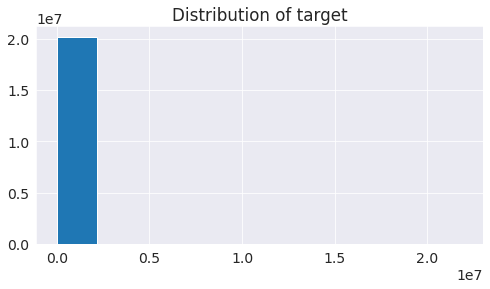

In [17]:
plt.hist(train_df['meter_reading']);
plt.title('Distribution of target');

The target value is highly right skewed or positively skewed data. So applying log transformation will make the distribution normal.
* To take care of zero values, log(1+x) is considered instead of log(x).

Observations:
* 20+ million rows 
* 4 types of meters
* 1449 buildings.
* `meter_reading` values are widely spread from 0 to 2.19047*10^7 kWh
* Dates range from 1st Jan 2016 to 31st December 2016
* The dataset takes up ~2.9 MB of space in the RAM
* No missing values
* As mensioned in the competition, meter readings of site 0 need to convert from KBTU to kWh.
* The reason for zero meter_reading is uncertain and need to deal properly.

### Test Set

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   row_id       int64         
 1   building_id  int16         
 2   meter        int8          
 3   timestamp    datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int64(1), int8(1)
memory usage: 755.6 MB


In [ ]:
test_df.describe()

,row_id,building_id,meter
count,4.169760e+07,4.169760e+07,4.169760e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01
std,1.203706e+07,4.297680e+02,9.278067e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00
50%,2.084880e+07,9.000000e+02,0.000000e+00
75%,3.127320e+07,1.194250e+03,1.000000e+00
max,4.169760e+07,1.448000e+03,3.000000e+00


In [ ]:
test_df.timestamp.min(),test_df.timestamp.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-12-31 23:00:00'))

Observations:
* 40+ million rows of data
* No missing values
* Same buildings as of train data from 0 to 1448
* same meter types as of training
* dates range from Jan 1st 2017 to Dec 31st 2018 (different from training set)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

### Weather data
There are 2 weather csv files, one is weather train data and the other is weather test data. Let us consider them separately and analyse.

#### Weather train data
Let us explore the weather train data.

In [ ]:
weather_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int8          
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float16       
 3   cloud_coverage      70600 non-null   float16       
 4   dew_temperature     139660 non-null  float16       
 5   precip_depth_1_hr   89484 non-null   float16       
 6   sea_level_pressure  129155 non-null  float16       
 7   wind_direction      133505 non-null  float16       
 8   wind_speed          139469 non-null  float16       
dtypes: datetime64[ns](1), float16(7), int8(1)
memory usage: 3.1 MB


In [ ]:
weather_train_df.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.0,139660.000000,89484.0,129155.0,133505.0,139469.000000
mean,7.478977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.604744,0.000000,0.0,0.000000,NaN,NaN,NaN,0.000000
min,0.000000,-28.906250,0.0,-35.000000,-1.0,968.0,0.0,0.000000
25%,3.000000,7.199219,0.0,0.600098,0.0,1012.0,80.0,2.099609
50%,7.000000,15.000000,2.0,8.296875,0.0,1016.5,190.0,3.099609
75%,11.000000,22.203125,4.0,14.398438,0.0,1021.0,280.0,5.000000
max,15.000000,47.187500,9.0,26.093750,343.0,1046.0,360.0,19.000000


In [ ]:
weather_train_df.timestamp.min(),weather_train_df.timestamp.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-31 23:00:00'))

Observations:
* 139773 rows of data
* Total 16 sites ranging from 0 to 15
* All weather data columns except `site_id` and `timestamp` has missing values.
* The dataset takes up 3.1 MB RAM.
* No abnormal values could be found in the statstical summary of weather data.
* Weather train has one year data.

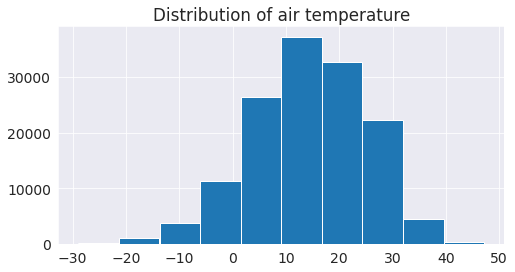

In [19]:
plt.hist(weather_train_df.air_temperature);
plt.title('Distribution of air temperature');

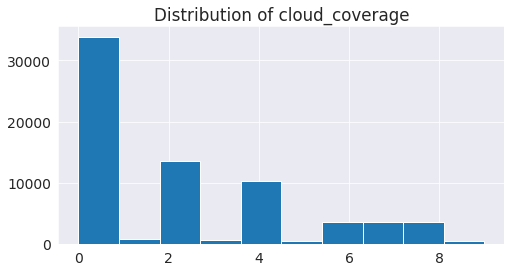

In [20]:
plt.hist(weather_train_df.cloud_coverage);
plt.title('Distribution of cloud_coverage');

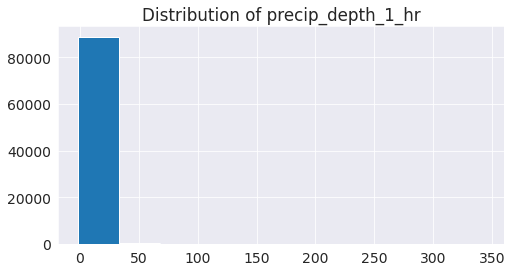

In [21]:
plt.hist(weather_train_df.precip_depth_1_hr);
plt.title('Distribution of precip_depth_1_hr');

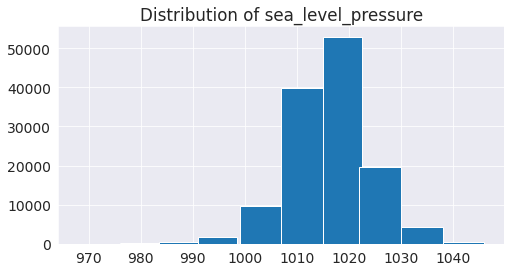

In [22]:
plt.hist(weather_train_df.sea_level_pressure);
plt.title('Distribution of sea_level_pressure');

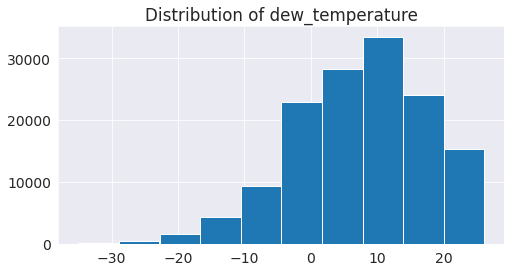

In [23]:
plt.hist(weather_train_df.dew_temperature);
plt.title('Distribution of dew_temperature');

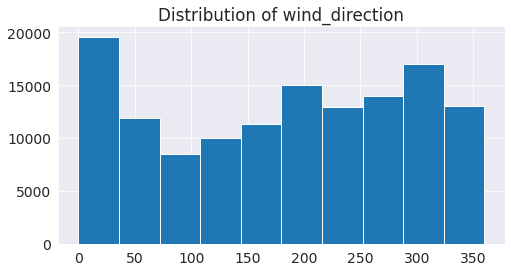

In [24]:
plt.hist(weather_train_df.wind_direction);
plt.title('Distribution of wind_direction');

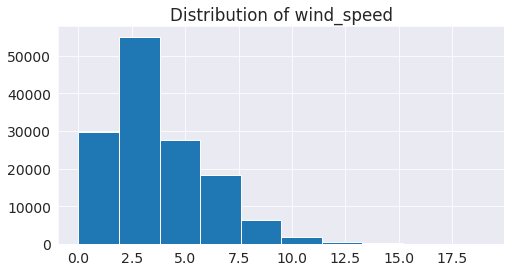

In [25]:
plt.hist(weather_train_df.wind_speed);
plt.title('Distribution of wind_speed');

All the weather train data columns except cloud_coverage, precipitaion_depth_1hr and wind_direction are distributed approximately noramal. This distribution picture is useful while filling the missing values. If the distribution is normal then it is appropriate to fill with mean or median value else depends on the distribution shape weather forwad fill or backward fill.

#### Weather test data
Let us explore the weather test data.

In [ ]:
weather_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             277243 non-null  int8          
 1   timestamp           277243 non-null  datetime64[ns]
 2   air_temperature     277139 non-null  float16       
 3   cloud_coverage      136795 non-null  float16       
 4   dew_temperature     276916 non-null  float16       
 5   precip_depth_1_hr   181655 non-null  float16       
 6   sea_level_pressure  255978 non-null  float16       
 7   wind_direction      264873 non-null  float16       
 8   wind_speed          276783 non-null  float16       
dtypes: datetime64[ns](1), float16(7), int8(1)
memory usage: 6.1 MB


In [ ]:
weather_test_df.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,277243.000000,277139.000000,136795.0,276916.000000,181655.0,255978.0,264873.0,276783.000000
mean,7.484654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.616959,0.000000,0.0,0.000000,NaN,NaN,NaN,0.000000
min,0.000000,-28.093750,0.0,-31.593750,-1.0,972.0,0.0,0.000000
25%,3.000000,7.199219,0.0,0.600098,0.0,1011.5,80.0,2.099609
50%,7.000000,15.000000,2.0,8.398438,0.0,1016.5,190.0,3.099609
75%,12.000000,22.203125,4.0,15.000000,0.0,1021.0,280.0,4.601562
max,15.000000,48.312500,9.0,26.703125,597.0,1050.0,360.0,24.203125


In [ ]:
weather_test_df.timestamp.min(),weather_test_df.timestamp.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-12-31 23:00:00'))

Observations:
* 277242 rows of data
* Total 16 sites ranging from 0 to 15
* All weather data columns except `site_id` and `timestamp` has missing values.
* The dataset takes up 6.1 MB RAM.
* No abnormal values could be found in the statstical summary of weather test data.
* Weather test has two years data.

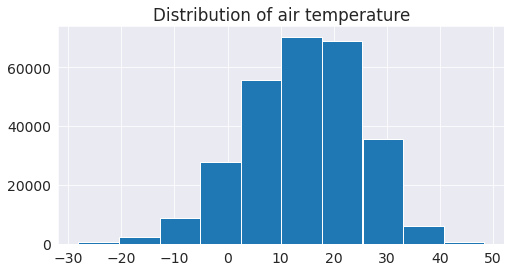

In [26]:
plt.hist(weather_test_df.air_temperature);
plt.title('Distribution of air temperature');

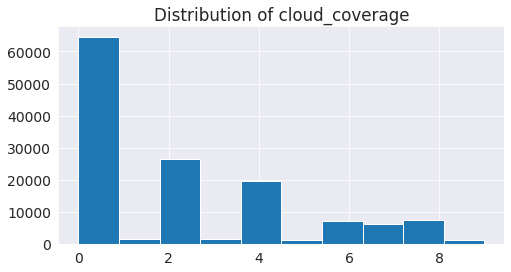

In [27]:
plt.hist(weather_test_df.cloud_coverage);
plt.title('Distribution of cloud_coverage');

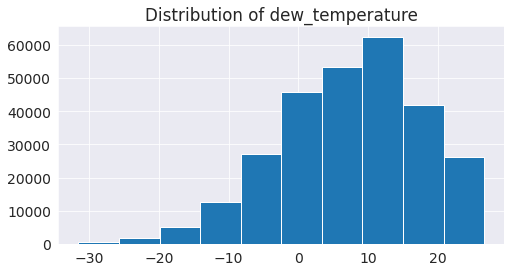

In [28]:
plt.hist(weather_test_df.dew_temperature);
plt.title('Distribution of dew_temperature');

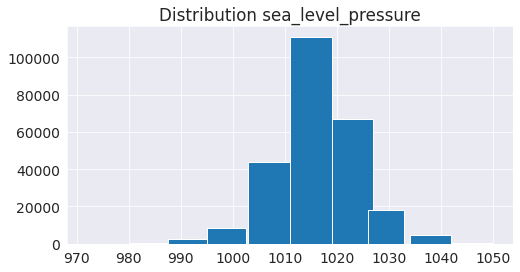

In [29]:
plt.hist(weather_test_df.sea_level_pressure);
plt.title('Distribution sea_level_pressure');

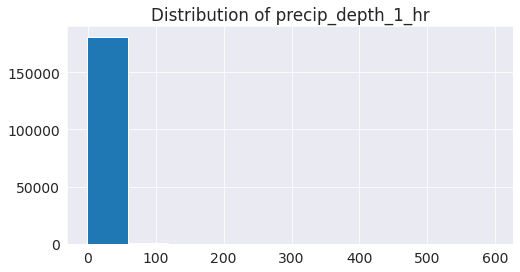

In [30]:
plt.hist(weather_test_df.precip_depth_1_hr);
plt.title('Distribution of precip_depth_1_hr');

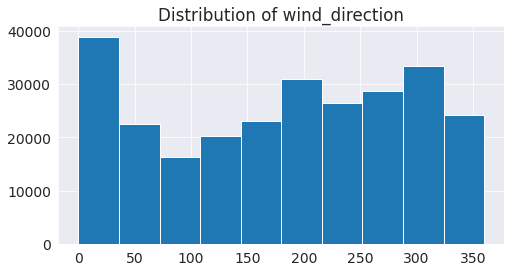

In [31]:
plt.hist(weather_test_df.wind_direction);
plt.title('Distribution of wind_direction');

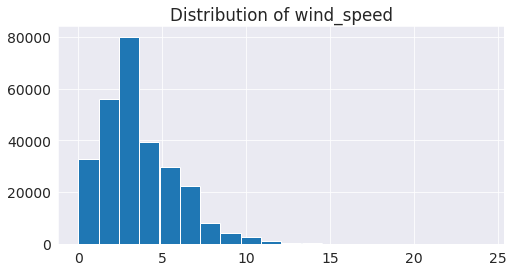

In [32]:
plt.hist(weather_test_df.wind_speed,20);
plt.title('Distribution of wind_speed');

### Building Data

In [ ]:
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int8   
 1   building_id  1449 non-null   int16  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int32  
 4   year_built   675 non-null    float16
 5   floor_count  355 non-null    float16
dtypes: float16(2), int16(1), int32(1), int8(1), object(1)
memory usage: 27.0+ KB


In [ ]:
building_df.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.0000,355.000000
mean,6.952381,724.000000,92111.776398,inf,3.740234
std,5.003432,418.434583,110769.950997,31.0625,3.333984
min,0.000000,0.000000,283.000000,1900.0000,1.000000
25%,3.000000,362.000000,23012.000000,1949.0000,1.000000
50%,5.000000,724.000000,57673.000000,1970.0000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.0000,5.000000
max,15.000000,1448.000000,875000.000000,2017.0000,26.000000


Observations:
* The data is collected from 16 different sites worldwide
* Total 1449 buildings readings are present
* The square feet of the buildings ranges from 283 to 875000. The distribution is quite high.
* The buildings built year is ranges from 1900 to 2017. Both 19th centuary and 20th centuary buildings are present. This is quite challenging.
* The floor_count of the buildings ranges from 1 to 26.

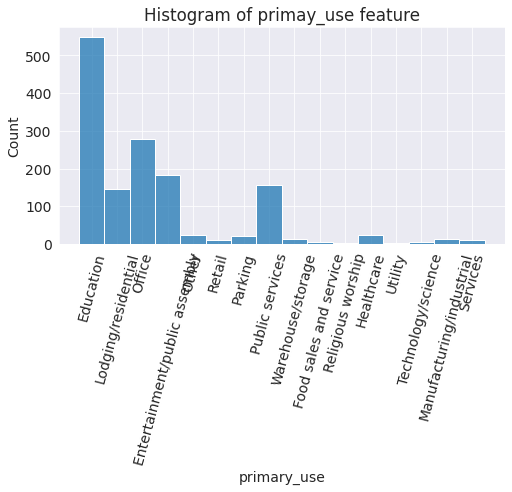

In [33]:
plt.xticks(rotation=75)
sns.histplot(building_df.primary_use);
plt.title('Histogram of primay_use feature');

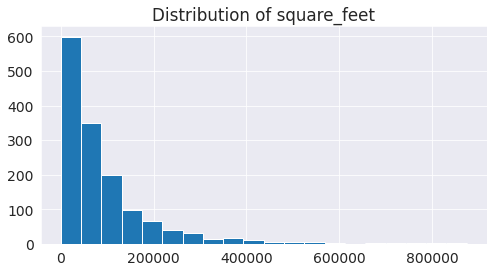

In [34]:
plt.hist(building_df.square_feet,bins=20);
plt.title('Distribution of square_feet');

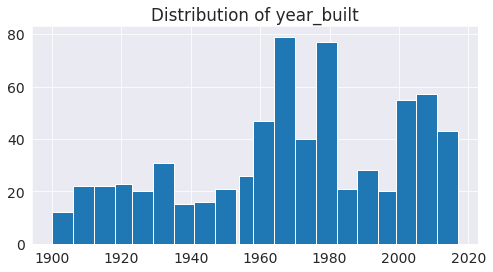

In [35]:
plt.hist(building_df.year_built,bins=20);
plt.title('Distribution of year_built');


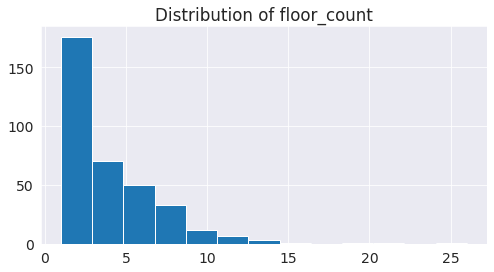

In [37]:
plt.hist(building_df.floor_count,bins=13);
plt.title('Distribution of floor_count');

In [38]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

## Data Preprocessing
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

### Fill/Remove missing values
If the percentage of missing values is less than 50 then fill it using the forward fill technique else remove the missing value rows.

Let us check the missing values in train data.

In [ ]:
train_df.isna().sum()/len(train_df)

building_id      0.0
meter            0.0
timestamp        0.0
meter_reading    0.0
dtype: float64

Train data does not have missing values.

Let us check the missing values in test set.

In [ ]:
train_df.isna().sum()/len(train_df)

building_id      0.0
meter            0.0
timestamp        0.0
meter_reading    0.0
dtype: float64

Teat also does not contain any missing values.

Now let us test weather data.

In [ ]:
weather_train_df.isna().sum()/len(weather_train_df)

site_id               0.000000
timestamp             0.000000
air_temperature       0.000393
cloud_coverage        0.494895
dew_temperature       0.000808
precip_depth_1_hr     0.359791
sea_level_pressure    0.075966
wind_direction        0.044844
wind_speed            0.002175
dtype: float64

Weather train data has missing values and the percentages are less tahn 50%. Let us define a helper function to fill these values.

In [ ]:
def fill_missing(df):
  for i in df.columns:
    if df[i].isna().sum()!=0:
      if df[i].dtype == 'float16':
        df[i]=df[i].astype('float32')
      if df[i][0]==np.nan:
        df[i][0]=df[i].mean()
      df[i].fillna(method='ffill',inplace=True)
  return df

In [ ]:
weather_train_df=fill_missing(weather_train_df)

In [ ]:
weather_test_df=fill_missing(weather_test_df)

Let us check the missing values in building data

In [ ]:
building_df.isna().sum()/len(building_df)

site_id        0.000000
building_id    0.000000
primary_use    0.000000
square_feet    0.000000
year_built     0.534161
floor_count    0.755003
dtype: float64

In building dataframe, the columns `year_built` and `floor_count` has missing values and their percentages are grater than 50%. So let us drop these columns.

In [ ]:
building_df.drop(columns=['year_built','floor_count'],inplace=True)

#### Weather data time alignment
In this notebook I want to share with you semi-automated approach of timestamp alignment in weather data following the notebook [here](https://www.kaggle.com/code/frednavruzov/aligning-temperature-timestamp/notebook).

According to this [thread](https://www.kaggle.com/c/ashrae-energy-prediction/discussion/114483#latest-659257), with high probability there are discrepancies between measurement timestamps and weather timestamps.
Particularly, it looks like weather data is not in local time format.

In [ ]:
temp_df=weather_train_df[['site_id','timestamp','air_temperature']]
temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
df_2d=temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Mean temperature rank by hour (init timestamps)')

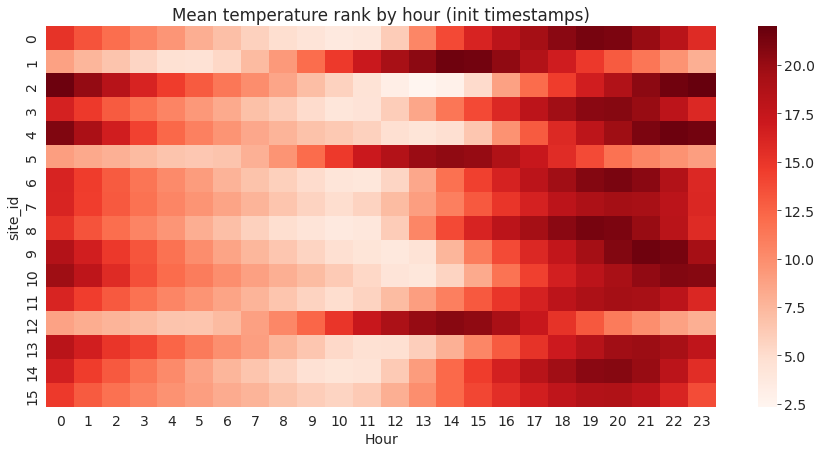

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_2d,cmap='Reds');
plt.xlabel('Hour')
plt.title('Mean temperature rank by hour (init timestamps)')


The above heatmap shows that different site_id's have maximum temperatures at different hours. This is certainly not possible. So we can conclude that weather data is not in local time format.

In [ ]:
def time_alignment(df):
  temp_df=df[['site_id','timestamp','air_temperature']]
  # calculate ranks of hourly temperatures within date/site_id chunks
  temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
  # create 2D dataframe of site_ids (0-16) x mean hour rank of temperature within day (0-23)
  df_2d=temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)
  # align scale, so each value within row is in [0,1] range
  df_2d = df_2d / df_2d.max(axis=1).values.reshape((-1,1))
  # sort by 'closeness' of hour with the highest temperature
  site_ids_argmax_maxtemp=pd.Series(np.argmax(df_2d.values,axis=1)).sort_values().index
  # assuming (1,5,12) tuple has the most correct temp peaks at 14:00
  site_ids_offsets= pd.Series(df_2d.values.argmax(axis=1) - 14)
  # align rows so that site_id's with similar temperature hour's peaks are near each other
  df_2d=df_2d.iloc[site_ids_argmax_maxtemp]
  temp_df['offset'] = temp_df.site_id.map(site_ids_offsets)
  # add offset
  temp_df['timestamp_aligned'] = (temp_df.timestamp - pd.to_timedelta(temp_df.offset, unit='H'))
  # replace the timestamp with aligned timestamps in the original dataframe
  df['timestamp']=temp_df['timestamp_aligned']
  return df 


In [ ]:
weather_train_df=time_alignment(weather_train_df)
weather_test_df=time_alignment(weather_test_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Now we will check the hourly mean tempaeratures rank after time alignment 

In [ ]:
temp_df=weather_train_df[['site_id','timestamp','air_temperature']]
temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
df_2d=temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Mean temperature rank by hour (aligned timestamps)')

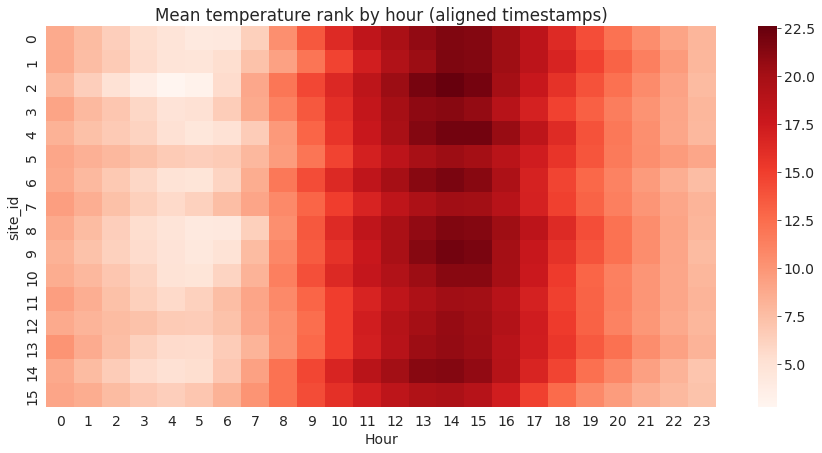

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_2d,cmap='Reds');
plt.xlabel('Hour')
plt.title('Mean temperature rank by hour (aligned timestamps)')

From this graph we can conclude that the timestamps are aligned.

### Encode categorical columns
Machine Learning models will accept only numerical values and hence the object data types need to be converted into numerical.

We have only one categorical column out of all the datasets and that is in building dataset. The `primary_use` column in the building dataset is object type. There are different techniques to convert the string type columns into numerical. Since one hot encoding technique increases the no.of columns and tend to increase the size of the dataset, which inturn reduces the speed of computation. Hence in this notebook we are using 'LabelEncoder' to convert strings to numericals.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical column primary use
le = LabelEncoder()
building_df["primary_use"] = le.fit_transform(building_df["primary_use"])

In [ ]:
building_df['primary_use']=building_df['primary_use'].astype('int8')

### Merging Data
We have completed the data preprocessing in individual datasets. Now it's time to merge the appropriate datasets and do data cleaning. The auxillary datasets need to merge with the train and test sets appropriately.

First, let us consider the training set and merge with the building set on common column `building_id`. Next the resultant dataset is merged with weather dataset on common features `site_id` and `time_stamp`.

In [40]:
#merge training data with building and weather data
train_build_df=train_df.merge(building_df,on='building_id',how='left')
train_merge_df=train_build_df.merge(weather_train_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
del weather_train_df, train_df,train_build_df

In [ ]:
train_merge_df.isna().sum()

building_id                0
meter                      0
timestamp                  0
meter_reading              0
site_id                    0
primary_use                0
square_feet                0
air_temperature       103451
cloud_coverage        103451
dew_temperature       103451
precip_depth_1_hr     103451
sea_level_pressure    103451
wind_direction        103451
wind_speed            103451
dtype: int64

In [ ]:
train_merge_df=fill_missing(train_merge_df)

In [ ]:
train_merge_df.isna().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

We will merge the test data later.

As discussed [here](https://www.kaggle.com/c/ashrae-energy-prediction/discussion/119261), the site 0 electric meter readings are in kBTU and need to convert to kWh. Multiply by 0.2931 to get to model inputs into kWh like the other sites, and 3.4118 to get back to kBTU for scoring.

In [41]:
# site 0 meter reading is given in KBTU, hence convert them to kwh
train_merge_df.loc[train_merge_df[train_merge_df['site_id']==0].index,'meter_reading']=train_merge_df[train_merge_df['site_id']==0]['meter_reading']*0.2931

### Drop outliers and unused features

Let us plot the hourly and daily average meter_reading for each site.

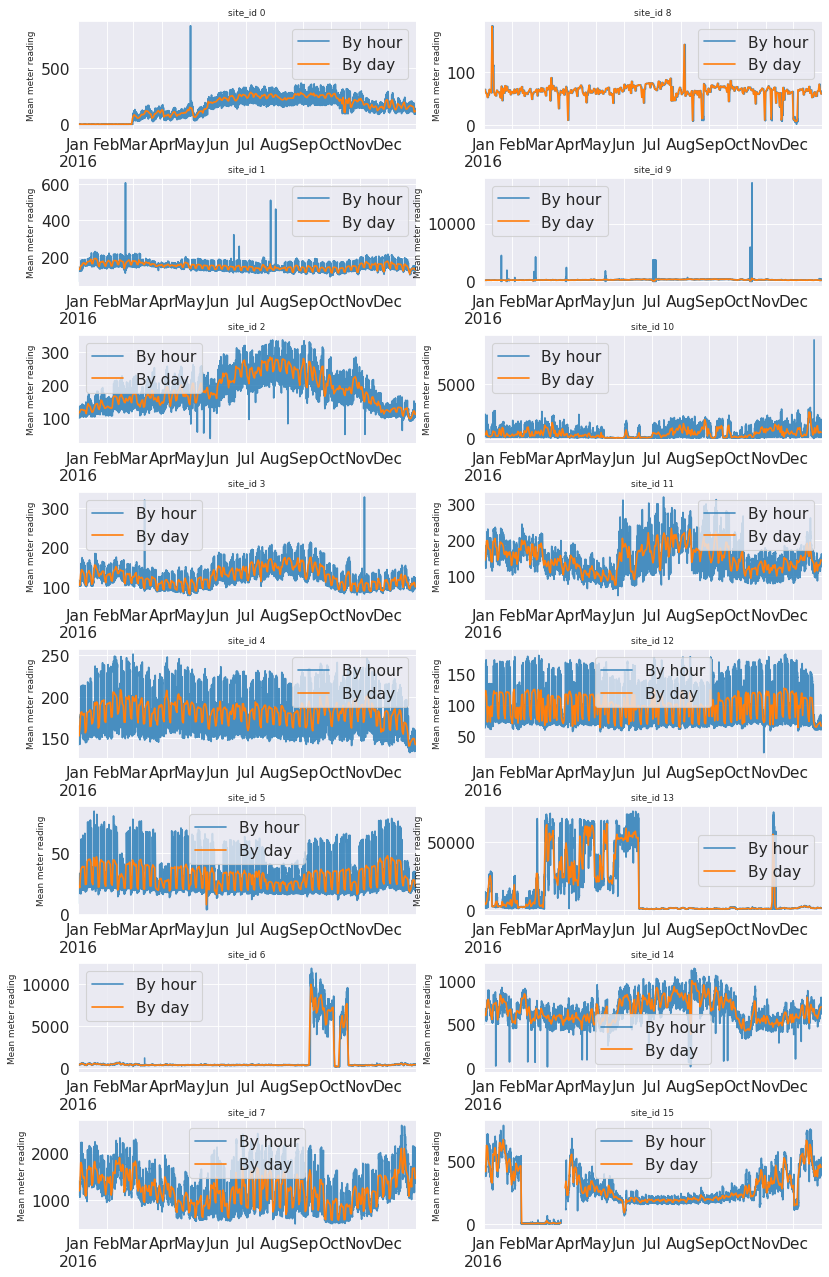

In [ ]:
fig, axes = plt.subplots(8,2,figsize=(12, 20), dpi=80)
plt.xticks(rotation=75)
for i in range(train_merge_df['site_id'].nunique()):
    train_merge_df[train_merge_df['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=8);
    train_merge_df[train_merge_df['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=8);
    plt.subplots_adjust(hspace=0.45)

As you can see above, the site 0 looks weired until May 20. It is reported in this discussion by @barnwellguy that all electricity meter is 0 until May 20 for site_id == 0. Let's remove these data from training data. And also sites 6, 10, 13 and 15 looks wierd at some particular durations. So let us remove all zero meter_reading rows from the training data whatever may be the reason for this. 


In [42]:
train_merge_df=train_merge_df[train_merge_df['meter_reading']!=0]
train_merge_df = train_merge_df.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20")')

Let us plot the scatter plot using building_id and meter_reading to notice the outliers. This is going to do with 1% training data to get quick response.

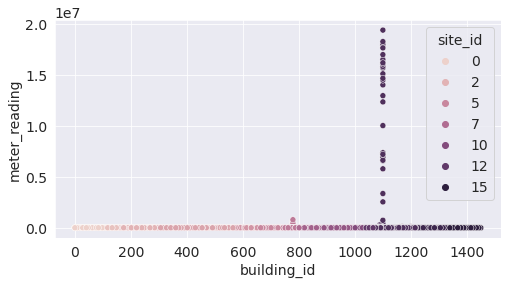

In [ ]:
train_sample=train_merge_df.sample(202161)
sns.scatterplot(x=train_sample.building_id,y=train_sample.meter_reading,hue=train_sample.site_id);
del train_sample

The above scatterplot shows that there is a building whose meter_readings are very much higher and appearing as outliers. So we should remove these outliers to get better results.

Let us identify this building by sorting the dataframe.

In [ ]:
train_merge_df.sort_values('meter_reading',ascending=False).head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
8907488,1099,2,2016-06-13 09:00:00,21904700.0,13,0,332884,24.406250,4.0,17.203125,0.0,1013.0,210.0,2.099609
8738539,1099,2,2016-06-10 09:00:00,21889900.0,13,0,332884,30.000000,4.0,19.406250,0.0,1007.0,210.0,4.601562
8736187,1099,2,2016-06-10 08:00:00,21874500.0,13,0,332884,28.296875,4.0,18.906250,0.0,1007.5,230.0,4.601562
17286421,1099,2,2016-11-09 14:00:00,21847900.0,13,0,332884,15.000000,2.0,1.700195,0.0,1023.5,230.0,4.601562
8905140,1099,2,2016-06-13 08:00:00,21844500.0,13,0,332884,22.796875,4.0,16.703125,0.0,1013.5,160.0,4.601562


The above result shows that building 1099 is having the highest meter_reading. So let us remove these building rows.

In [43]:
train_merge_df = train_merge_df [ train_merge_df['building_id'] != 1099 ]

### Feature engineering
The dataset is time series because we have timestamp column in our data. Using this time feature directly will not help in any way beacuse model will not learn anything from this time column. So we have to extract useful features from this time column. 

In [ ]:
def breakdown_timestamp(dataframe):
   dataframe['hour']= np.uint8(dataframe['timestamp'].dt.hour)
   dataframe['day']= np.uint8(dataframe['timestamp'].dt.day)
   dataframe['weekday']= np.uint8(dataframe['timestamp'].dt.weekday)
   dataframe['month']= np.uint8(dataframe['timestamp'].dt.month)
   #dataframe['year']= np.uint16(dataframe['timestamp'].dt.year)
   dataframe.drop(['timestamp'],axis=1,inplace=True)
   return dataframe

In [ ]:
train_merge_df=breakdown_timestamp(train_merge_df)

At this stage, we will apply logarithmic function to meter_reading values to make the distribution normal.

In [45]:
# take logarthmic value of meter reading
train_merge_df['meter_reading']=np.log1p(train_merge_df["meter_reading"])

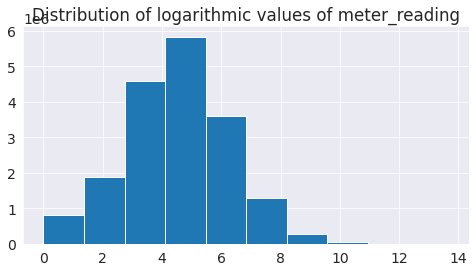

In [46]:
plt.hist(train_merge_df['meter_reading']);
plt.title('Distribution of logarithmic values of meter_reading');

In [47]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

### Extract Inputs & Outputs
In this section, we will select input features and target column.

In [ ]:
input_columns=['building_id', 'site_id','primary_use', 'square_feet', 'air_temperature', 'cloud_coverage','dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction','wind_speed', 'hour', 'day','weekday', 'month']

In [ ]:
output_columns='meter_reading'

### Split Training & Validation Set
We are taking 100% training data and splitting 60% as training set and 40% as validation set.

In [ ]:
from sklearn.model_selection import train_test_split

trainset_df,validset_df =  train_test_split(train_merge_df, 
                                    test_size=0.4, 
                                    random_state=42)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

### Merge Test with auxillary datasets

Now we will merge test data with building and weather datasets.




In [ ]:
test_df=test_df.merge(building_df,on='building_id',how='left')
test_df=test_df.merge(weather_test_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
del building_df
del weather_test_df


Let us fill the missing values generated after merging.

In [ ]:
test_df=fill_missing(test_df)

we will do feature engineering using the helper function defined in feature enginnering section.

In [ ]:
test_df=breakdown_timestamp(test_df)

## Train & Evaluate different models
In this section we are going to train linear regression, decision trees, random forest, XGBOOST and LGBM models. And also going to tune hyperparameters for XGBOOST and LGBM models for better performance.

### Baseline model - Linear Regression

We'll train linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(trainset_df[input_columns], trainset_df[output_columns])

LinearRegression()

The competition suggested RMSLE as evaluation metric but we have trained the model with log scaled target and hence RMSE is used as evaluation metric here.

In [ ]:
train_rmse = mean_squared_error(trainset_df[output_columns], linreg_model.predict(trainset_df[input_columns]), squared=False)
train_rmse

1.4565257797255662

In [ ]:
val_rmse = mean_squared_error(validset_df[output_columns],linreg_model.predict(validset_df[input_columns]), squared=False)
val_rmse

1.4565425080825345

The train and validation RMSE's are 1.45652 and 1.45654, which are almost similar. That means the model is performing same on both training and validation sets. 

Let us evaluate the test data and submit to the kaggle to know where we are.

In [ ]:
def evaluate_test(model,fname):
  test_preds=model.predict(test_df[input_columns])
  test_df['meter_reading']=test_preds
  test_df.loc[test_df[test_df['site_id']==0].index,'meter_reading']=test_df[test_df['site_id']==0]['meter_reading']*3.4118
  sample_submission = pd.read_csv('/content/ashrae-energy-prediction/sample_submission.csv')
  sample_submission['meter_reading']=round(test_df['meter_reading'],4)
  sample_submission.loc[sample_submission[sample_submission['meter_reading']<0].index,'meter_reading']=0
  sample_submission.to_csv(fname, index=None)
  test_df.drop(columns=['meter_reading'],axis=1,inplace=True)
  del sample_submission


In [ ]:
evaluate_test(linreg_model,'linreg.csv')

![](https://i.imgur.com/aXt7ZsD.png)

The private score on learderboard is 3.060 which is very high.

### Decision Tree Regressor
Next we will go to tree based models and evaluate. Decision tree is the base model for tree based models.

In [ ]:
dec_model = DecisionTreeRegressor(random_state=33)
dec_model.fit(trainset_df[input_columns], trainset_df[output_columns])
train_rmse =  mean_squared_error(trainset_df[output_columns], dec_model.predict(trainset_df[input_columns]), squared=False)
val_rmse =  mean_squared_error(validset_df[output_columns], dec_model.predict(validset_df[input_columns]), squared=False)
print('train_rmse is {}, val_rmse is {}'.format(train_rmse, val_rmse))

train_rmse is 0.7057570739194736, val_rmse is 1.402794422892031


The train and validation rmse's for decision tree model are 0.70576 and 1.40208 respectively. This means the model is performing well with training data but poor with validation data even though the scores are better than linear regression model. This phenomenon of well performance with training data but poor with validation data is called overfitting. This problem can be overcome with the ensembling techniques. As we know there are 2 ensembling techniques: bagging and boosting. Let us first see bagging technique and the best example is Random forest model.



### Ensembling Techniques
#### Randomforest model (Bagging technique)
Since randomforest is very sluggish, we want to train the model with around 1% data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
train_set_samp=trainset_df.sample(frac=0.2,random_state=42)
val_set_samp=validset_df.sample(frac=0.2,random_state=42)
random_model = RandomForestRegressor(n_jobs=-1, random_state=42)
random_model.fit(train_set_samp[input_columns], train_set_samp[output_columns])
train_rmse =  mean_squared_error(train_set_samp[output_columns], random_model.predict(train_set_samp[input_columns]), squared=False)
val_rmse =  mean_squared_error(val_set_samp[output_columns], random_model.predict(val_set_samp[input_columns]), squared=False)
print('train_rmse is {}, val_rmse is {}'.format(train_rmse, val_rmse))
del train_set_samp,val_set_samp

train_rmse is 0.46635811258539656, val_rmse is 1.0152849141349296


The train and validation losses are 0.37809 and 0.99422 respectively. This is also overfitting the model. The solution to this problem is hyperparameter tuning. The hyperparameters are :
* tree depth
* number of variables sampled at each split.
* no.of trees
* sample size
* no.of features for each tree
* no.of leaf nodes

In [ ]:
evaluate_test(random_model,'randomreg.csv')

![](https://i.imgur.com/lZX3QK1.png)

### Boosting Techniques
Next, let us try boosting technique. We have basically two types of boosting techniques: Adaptive boosting and gradient boosting.
* Adaptive boosting: Only for classification problems.
* Gradient boosting: Both for classification and regression tasks.

For this problem gradient boosting is suitable. There are again 4 types of gradient boosting algorithms.
* GBM-Gradient boosting machine (sequential processing)
* XGBOOST - Extreme Gradient Boosting Machine (parallel processing at node level)
* LGBM - LightGBM (leaf wise tree growth)
* CATBOOST- handle categorical variables



#### XGBOOST Model

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=33, n_jobs=-1, objective='reg:squarederror')
xgb_model.fit(trainset_df[input_columns], trainset_df[output_columns])
train_rmse =  mean_squared_error(trainset_df[output_columns], xgb_model.predict(trainset_df[input_columns]), squared=False)
val_rmse =  mean_squared_error(validset_df[output_columns], xgb_model.predict(validset_df[input_columns]), squared=False)
print('train_rmse is {}, val_rmse is {}'.format(train_rmse, val_rmse))

[10:57:39] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
train_rmse is 1.2247728109359741, val_rmse is 1.224581241607666


The train and validation rmse's are 1.22477 and 1.22458 respectively. These losses are almost similar and the model is not overfitted.

Let us evaluate the model on test data.

In [ ]:
evaluate_test(xgb_model,'xgbreg.csv')

![](https://i.imgur.com/K0B9cDh.png)


#### Hyperparameter tuning for XGBOOST model

Let us define a helper function to tune the hyperparameters of any model.

In [ ]:
import matplotlib.pyplot as plt
trainset_samp=trainset_df.sample(frac=0.2,random_state=33)
validset_samp=validset_df.sample(frac=0.2,random_state=33)
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(trainset_samp[input_columns], trainset_samp[output_columns])
    train_rmse =  mean_squared_error(model.predict(trainset_samp[input_columns]), trainset_samp[output_columns], squared=False)
    val_rmse =  mean_squared_error(model.predict(validset_samp[input_columns]), validset_samp[output_columns], squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    return train_rmse,val_rmse

In [ ]:
best_params = {
    'random_state': 33,
    'n_jobs': -1,
    
}

**n_estimators**: No.of trees


[11:12:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 56min 17s, sys: 1.58 s, total: 56min 19s
Wall time: 7min 18s


(1.1087457, 1.1086556)

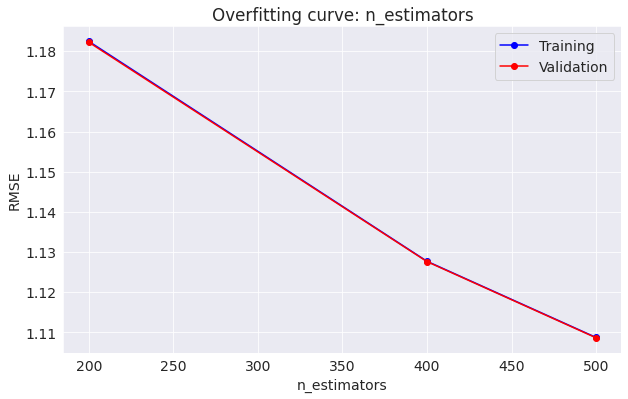

In [ ]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [200,400,500], **best_params)

In [ ]:
best_params['n_estimators'] = 500
best_params['max_depth']=10

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

**Learning rate**: 

[11:19:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 7h 17min 46s, sys: 8.12 s, total: 7h 17min 54s
Wall time: 55min 33s


(0.7714769, 0.9609799)

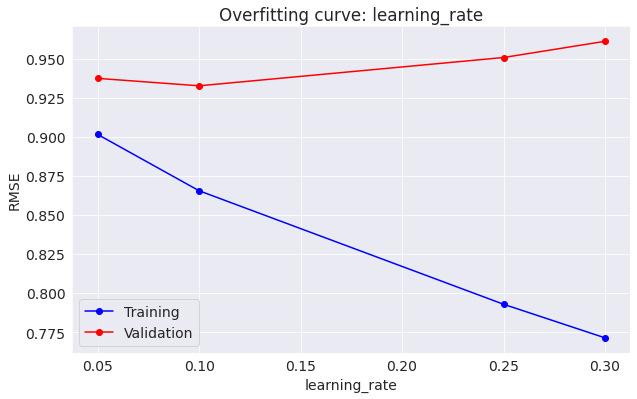

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25,0.3], **best_params)

In [ ]:
best_params['learning_rate']=0.1

**No.of leaves**

[12:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.8654629, 0.9325507)

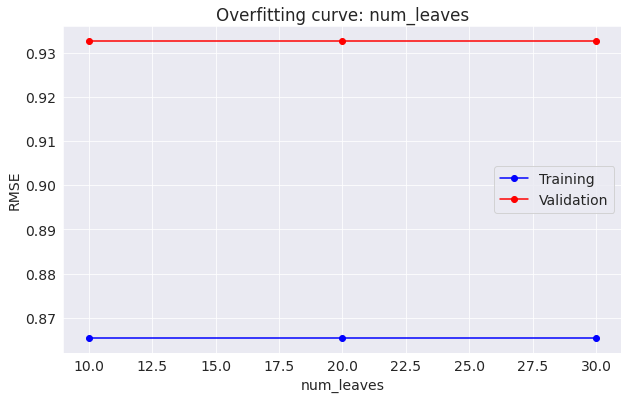

In [ ]:
test_param_and_plot(XGBRegressor, 'num_leaves', [10,20,30], **best_params)

In [ ]:
best_params['num_leaves']=10

#### LightGBM Regressor
Since the data is widely spread with different meter types, we are training the LGBM model for each meter type separately  and merging the result. Let us use kfold for better result.

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model_lgbm = LGBMRegressor(random_state=33, n_jobs=-1, **params)
    model_lgbm.fit(X_train, train_targets)
    train_rmse = mean_squared_error(train_targets, model_lgbm.predict(X_train), squared=False)
    val_rmse = mean_squared_error(val_targets, model_lgbm.predict(X_val), squared=False)
    return model_lgbm, train_rmse, val_rmse

In [ ]:
kfold = KFold(n_splits=3)

In [ ]:
def train_kfold(train_df, target_meter):
  models=[]
  train_meter_df=train_df[train_df['meter']==target_meter]
  for train_idxs, val_idxs in kfold.split(train_meter_df[input_columns]):
    X_train, train_targets = train_meter_df[input_columns].iloc[train_idxs], train_meter_df[output_columns].iloc[train_idxs]
    X_val, val_targets = train_meter_df[input_columns].iloc[val_idxs], train_meter_df[output_columns].iloc[val_idxs]
    model_lgbm, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets)
    models.append(model_lgbm)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
  del train_meter_df
  return models

In [ ]:
models0=train_kfold(train_merge_df,0)


Train RMSE: 0.5850899609007508, Validation RMSE: 0.6026779874843002
Train RMSE: 0.5837430843337894, Validation RMSE: 0.6376107882690648
Train RMSE: 0.5774392951881825, Validation RMSE: 0.6190560720275579


In [ ]:
models1=train_kfold(train_merge_df,1)

Train RMSE: 0.8029577286372607, Validation RMSE: 0.9866851808906907
Train RMSE: 0.8366424186119032, Validation RMSE: 0.9074518070853628
Train RMSE: 0.8124761827287681, Validation RMSE: 0.9497614968505742


In [ ]:
models2=train_kfold(train_merge_df,2)

Train RMSE: 0.7174990185273957, Validation RMSE: 0.8574385071237007
Train RMSE: 0.6636929057341786, Validation RMSE: 0.9585923939477039
Train RMSE: 0.7086662175363726, Validation RMSE: 0.8027881577151825


In [ ]:
models3=train_kfold(train_merge_df,3)

Train RMSE: 0.7221836837436917, Validation RMSE: 1.0256233416113227
Train RMSE: 0.7309939516464378, Validation RMSE: 0.8894273682637539
Train RMSE: 0.6889055629546064, Validation RMSE: 1.0694526258224013


In [ ]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
test0_preds=predict_avg(models0,test_df[test_df['meter']==0][input_columns])
test1_preds=predict_avg(models1,test_df[test_df['meter']==1][input_columns])
test2_preds=predict_avg(models2,test_df[test_df['meter']==2][input_columns])
test3_preds=predict_avg(models3,test_df[test_df['meter']==3][input_columns])

In [ ]:
test_df.loc[test_df['meter'] == 0, 'meter_reading'] = np.expm1(test0_preds)
test_df.loc[test_df['meter'] == 1, 'meter_reading'] = np.expm1(test1_preds)
test_df.loc[test_df['meter'] == 2, 'meter_reading'] = np.expm1(test2_preds)
test_df.loc[test_df['meter'] == 3, 'meter_reading'] = np.expm1(test3_preds)


In [ ]:
test_df.loc[test_df[test_df['site_id']==0].index,'meter_reading']=test_df[test_df['site_id']==0]['meter_reading']*3.4118

In [ ]:
sample_submission = pd.read_csv('/content/ashrae-energy-prediction/sample_submission.csv')
sample_submission['meter_reading']=round(test_df['meter_reading'],4)
sample_submission.loc[sample_submission[sample_submission['meter_reading']<0].index,'meter_reading']=0


In [ ]:
sample_submission.to_csv('meterlgbmcloud_submission.csv', index=None)

In [ ]:
sample_submission

,row_id,meter_reading
0,0,111.0973
1,1,37.0519
2,2,15.0160
3,3,196.4587
4,4,1061.7986
...,...,...
41697595,41697595,10.6017
41697596,41697596,4.5603
41697597,41697597,7.7398
41697598,41697598,124.1656


![](https://i.imgur.com/XfBJvQr.png)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction


'https://jovian.ai/prasanthi-vvit/ashrae-energy-prediction'

#### Hyperparameter tuning for LGBM model
Let us tune the hyperpameters of LGBM model using the helper function defined in XGBOOST hyperparameter tuning section.

**n_estimators**

(1.029302980464703, 1.0305071411069346)

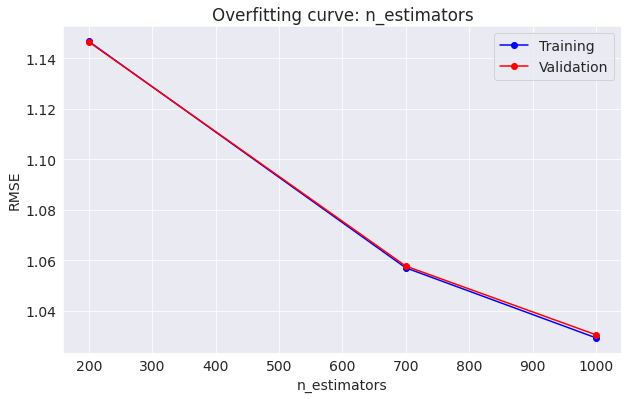

In [ ]:
test_param_and_plot(LGBMRegressor, 'n_estimators', [200,700,1000], **best_params)

In [ ]:
best_params['n_estimators']=1000

**max_depth**

(1.0293029804647031, 1.0305071411069342)

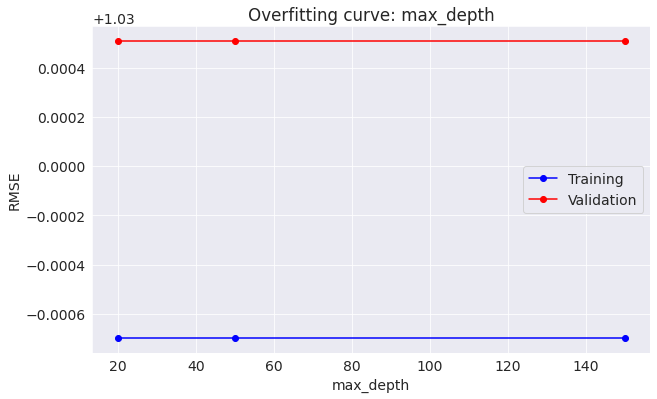

In [ ]:
test_param_and_plot(LGBMRegressor, 'max_depth', [20,50,150], **best_params)

In [ ]:
best_params['max_depth']=50

**learning_rate**

CPU times: user 32min 43s, sys: 913 ms, total: 32min 44s
Wall time: 4min 10s


(0.9617993852545798, 0.9666326747474752)

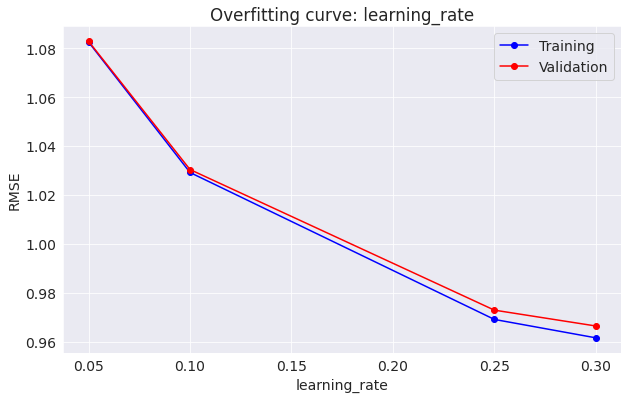

In [ ]:
%%time
test_param_and_plot(LGBMRegressor, 'learning_rate', [0.05, 0.1, 0.25,0.3], **best_params)

In [ ]:
best_params['learning_rate']=0.25

**num_leaves**

(0.8562290148034797, 0.9438086058102787)

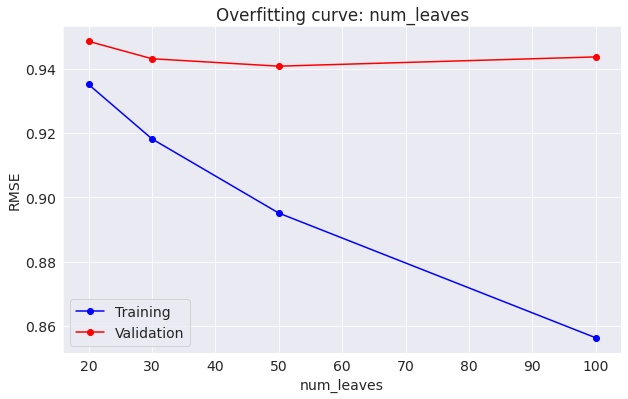

In [ ]:
test_param_and_plot(LGBMRegressor, 'num_leaves', [20,30,50,100], **best_params)

In [ ]:
best_params['num_leaves']=50

In [ ]:
best_params.pop('random_state')

33

**random_state**

(0.8947685227588225, 0.9406230945200581)

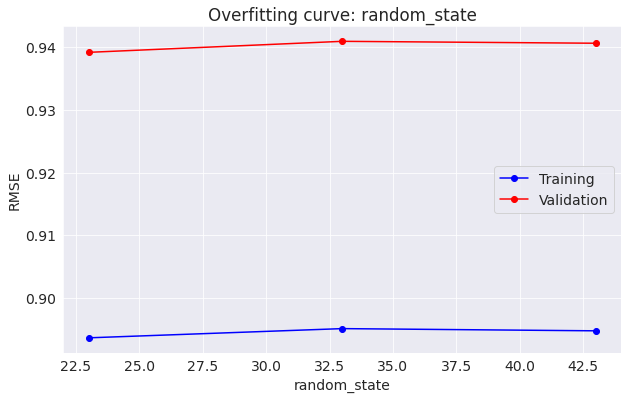

In [ ]:
test_param_and_plot( LGBMRegressor,'random_state', [23,33,43],**best_params)

In [ ]:
best_params['random_state']=33

#### LGBM Model with kfold and tuned hyperparameters
Let us use all the above tuned hyperparameters and train the model.

In [ ]:
def train_kfold(train_df, target_meter):
  models=[]
  train_meter_df=train_df[train_df['meter']==target_meter]
  for train_idxs, val_idxs in kfold.split(train_meter_df[input_columns]):
    X_train, train_targets = train_meter_df[input_columns].iloc[train_idxs], train_meter_df[output_columns].iloc[train_idxs]
    X_val, val_targets = train_meter_df[input_columns].iloc[val_idxs], train_meter_df[output_columns].iloc[val_idxs]
    model_lgbm, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets,n_estimators=1000,max_depth=50,learning_rate=0.25,num_leaves=50,subsample=0.9,colsample_bytree=0.7)
    models.append(model_lgbm)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
  del train_meter_df
  return models

In [ ]:
models0=train_kfold(train_merge_df,0)

Train RMSE: 0.23909098347103203, Validation RMSE: 0.4262194386589919
Train RMSE: 0.2343946601860778, Validation RMSE: 0.39147997915222754
Train RMSE: 0.24224984958901832, Validation RMSE: 0.4453445498332071


In [ ]:
models1=train_kfold(train_merge_df,1)

Train RMSE: 0.3960626572385194, Validation RMSE: 0.8293209976756156
Train RMSE: 0.42788222391847586, Validation RMSE: 0.6491768871711727
Train RMSE: 0.40521524432170997, Validation RMSE: 0.9012534312161469


In [ ]:
models2=train_kfold(train_merge_df,2)

Train RMSE: 0.41868882735532725, Validation RMSE: 0.9100707831069729
Train RMSE: 0.38217905943637387, Validation RMSE: 0.8242155473044156
Train RMSE: 0.40804825410380124, Validation RMSE: 0.9622232900502233


In [ ]:
models3=train_kfold(train_merge_df,3)

Train RMSE: 0.4394511905041769, Validation RMSE: 1.172876448992866
Train RMSE: 0.44438965472325676, Validation RMSE: 0.861567654610535
Train RMSE: 0.4138509508502497, Validation RMSE: 1.2160876622228556


In [ ]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
test0_preds=predict_avg(models0,test_df[test_df['meter']==0][input_columns])
test1_preds=predict_avg(models1,test_df[test_df['meter']==1][input_columns])
test2_preds=predict_avg(models2,test_df[test_df['meter']==2][input_columns])
test3_preds=predict_avg(models3,test_df[test_df['meter']==3][input_columns])

In [ ]:
test_df.loc[test_df['meter'] == 0, 'meter_reading'] = np.expm1(test0_preds)
test_df.loc[test_df['meter'] == 1, 'meter_reading'] = np.expm1(test1_preds)
test_df.loc[test_df['meter'] == 2, 'meter_reading'] = np.expm1(test2_preds)
test_df.loc[test_df['meter'] == 3, 'meter_reading'] = np.expm1(test3_preds)


NOTE: Before submitting the file do the follwoing:
*  site 0 should be multiplied by 3.4118 to get back to kBTU for scoring 
*  All floats in the solution file were truncated to four decimal places; we recommend you do the same to save space on your file upload.



In [ ]:
test_df.loc[test_df[test_df['site_id']==0].index,'meter_reading']=test_df[test_df['site_id']==0]['meter_reading']*3.4118

In [ ]:
sample_submission = pd.read_csv('/content/ashrae-energy-prediction/sample_submission.csv')
sample_submission['meter_reading']=round(test_df['meter_reading'],4)
sample_submission.loc[sample_submission[sample_submission['meter_reading']<0].index,'meter_reading']=0


In [ ]:
sample_submission.to_csv('meterlgbmhyper5_submission.csv', index=None)

In [ ]:
sample_submission

,row_id,meter_reading
0,0,143.3470
1,1,67.4296
2,2,3.7535
3,3,325.3490
4,4,1448.8723
...,...,...
41697595,41697595,6.2237
41697596,41697596,4.3563
41697597,41697597,8.1039
41697598,41697598,168.3196


![](https://i.imgur.com/qHqDv4g.png)

In [ ]:
jovian.commit()

## Summary:

- In this project we have downloaded the datasets from Kaggle 
- This is a classical ML Regression problem
- Explored the datasets with visualizations
- Filled missing values
- Corrected the time mismatch
- Deleted outliers, zero meter readings and not required features
- Encoded categorical variables
- Fitted various models to test best accuracies on test and validation sets
- The evaluation matrics used is RMSLE. 
- Tuned hyperparameters on XGBOOST, LGBM model for best performance and model to be free from overfitting
- Training the LGBM mdoel by meter type with kfold worked out.
- Made the  predictions on test dataset
- saved the predictions to the submission dataset
- exported the predictions on submission.csv file
- This csv file is downloaded and submitted to Kaggle.



## Future Work
- There is a need for better hyperparameter tuning which could give us better results on validation dataset. However, it is known that boosting models generally perform better than the bagging models.
- LightGBM and XGboost models could be tested further to get better accuracy.
- Lag features and rolling window to be used for better performance
- In LGBM model, specify categorical features and evaluate
- The reason for zero meter reading need to analyse and identify when it is happening.
- Further feature engineering need to do.
- Leakage in the data need to be resolved for better results.


## References
* Dataset link: https://www.kaggle.com/competitions/ashrae-energy-prediction/data

* Machine learning: https://www.geeksforgeeks.org/machine-learning/
* lightGBM documentation: https://lightgbm.readthedocs.io/en/latest/Parameters.html

* timestamp alignment: https://www.kaggle.com/code/frednavruzov/aligning-temperature-timestamp/notebook

* LGBM training by meter type: https://www.kaggle.com/code/nz0722/aligned-timestamp-lgbm-by-meter-type

* Strategy evaluation: https://www.kaggle.com/code/purist1024/strategy-evaluation-what-helps-and-by-how-much/notebook

* [Machine learning workshop by Jovian](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/workshop-machine-learning-project-from-scratch)
* [XGBOOST lesson by Jovian](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost) 
* [Machine Learning approach by Jovian](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems)

In [ ]:
jovian.commit()